In [50]:
import math
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/NVDA.csv')

In [4]:
df.head()

,timestamp,open,high,low,close,volume
0,2020-03-23 09:31:00,204.1600,204.1600,204.16,204.1600,568408
1,2020-03-23 09:32:00,204.3191,204.5065,200.56,200.7100,81709
2,2020-03-23 09:33:00,200.7299,206.1234,200.69,205.3801,59476
3,2020-03-23 09:34:00,205.4900,208.4999,204.12,207.7100,69771
4,2020-03-23 09:35:00,205.8200,205.8200,205.82,205.8200,57105


In [17]:
df.describe()

,open,high,low,close,volume
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,244.235866,244.677157,243.796044,244.237693,39620.133436
std,18.494774,18.416071,18.552061,18.485299,36288.296704
min,200.185000,200.865000,200.185000,200.460000,148.000000
25%,242.655000,243.154400,242.250000,242.675600,21617.000000
50%,252.784700,253.199000,252.430000,252.771200,32066.000000
75%,256.472300,256.880000,256.090000,256.465100,46758.000000
max,262.997000,263.117700,262.540000,263.080000,677389.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2020-03-23 09:31:00 to 2020-03-27 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1941 non-null   float64
 1   high    1941 non-null   float64
 2   low     1941 non-null   float64
 3   close   1941 non-null   float64
 4   volume  1941 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 91.0 KB


In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['timestamp'] = df['Mycol'].apply(lambda x: dt.datetime.strptime(x, '%d%b%Y:%H:%M:%S.%f'))
df = df.set_index('timestamp')

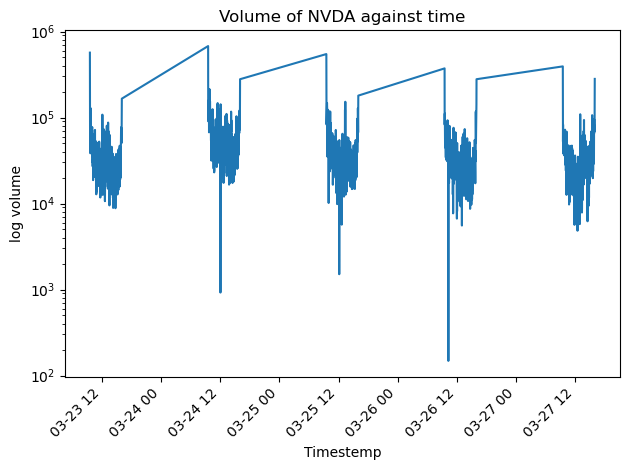

In [36]:
plt.plot(df.index, df['volume'])
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Volume of NVDA against time')
plt.xlabel('Timestemp')
plt.ylabel('log volume')
plt.tight_layout()
plt.show()

In [30]:
df['volatiliy'] = abs(df['close'] - df['open']) / df['open']

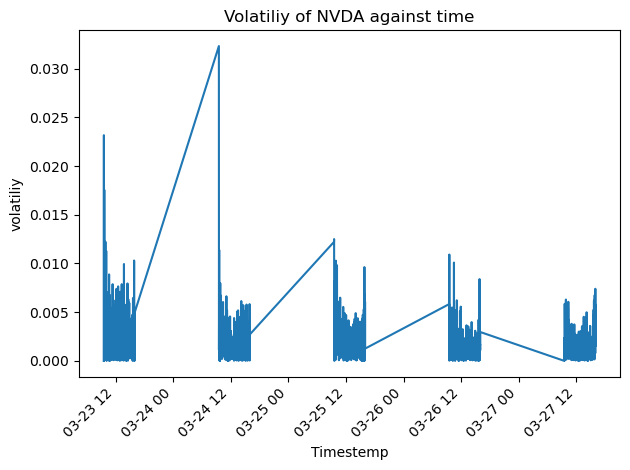

In [34]:
plt.plot(df.index, df['volatiliy'])
# plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Volatiliy of NVDA against time')
plt.xlabel('Timestemp')
plt.ylabel('volatiliy')
plt.tight_layout()
plt.show()

In [42]:
df_5min = df.resample('5min').mean()

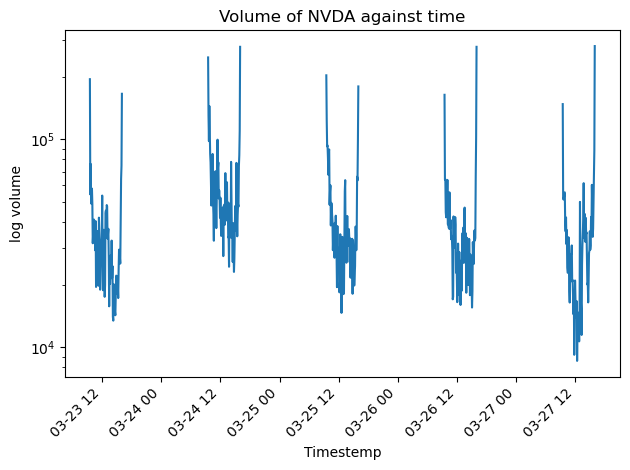

In [43]:
plt.plot(df_5min.index, df_5min['volume'])
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Volume of NVDA against time')
plt.xlabel('Timestemp')
plt.ylabel('log volume')
plt.tight_layout()
plt.show()

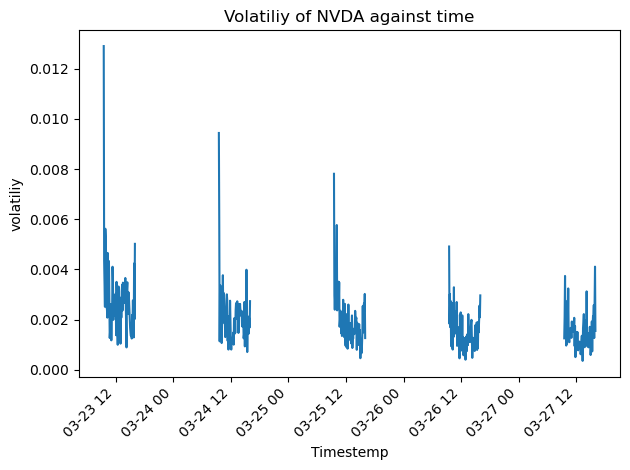

In [44]:
plt.plot(df_5min.index, df_5min['volatiliy'])
# plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Volatiliy of NVDA against time')
plt.xlabel('Timestemp')
plt.ylabel('volatiliy')
plt.tight_layout()
plt.show()

In [79]:
dates = pd.date_range(start=df.index[0], end=df.index[-1])

DatetimeIndex(['2020-03-23 09:31:00', '2020-03-24 09:31:00',
               '2020-03-25 09:31:00', '2020-03-26 09:31:00',
               '2020-03-27 09:31:00'],
              dtype='datetime64[ns]', freq='D')

In [80]:
df.index

DatetimeIndex(['2020-03-23 09:31:00', '2020-03-23 09:32:00',
               '2020-03-23 09:33:00', '2020-03-23 09:34:00',
               '2020-03-23 09:35:00', '2020-03-23 09:36:00',
               '2020-03-23 09:37:00', '2020-03-23 09:38:00',
               '2020-03-23 09:39:00', '2020-03-23 09:40:00',
               ...
               '2020-03-27 15:51:00', '2020-03-27 15:52:00',
               '2020-03-27 15:53:00', '2020-03-27 15:54:00',
               '2020-03-27 15:55:00', '2020-03-27 15:56:00',
               '2020-03-27 15:57:00', '2020-03-27 15:58:00',
               '2020-03-27 15:59:00', '2020-03-27 16:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=1941, freq=None)

In [ ]:
corr_matrix = []
for i in range(len(dates)):
    date = dates[i]
    nextDate = date[i+1]
    temp = df[df.index[]]
    corr_matrix.append()

In [59]:
df_days = df.resample('1D').mean()

In [73]:
df['volatiliy_hl'] = abs(df['high'] - df['low']) / df['low']
df['volatiliy_oc'] = abs(df['close'] - df['open']) / df['open']

In [91]:
df.groupby([df.index.date]).mean()

,open,high,low,close,volume,volatiliy,volatiliy_hl,volatiliy_oc,volatiliy_OC
2020-03-23,208.889987,209.449134,208.353344,208.894307,33200.835897,0.002737,0.005263,0.002737,0.002737
2020-03-24,245.329547,245.831925,244.873793,245.381439,56765.568123,0.002076,0.003928,0.002076,0.002076
2020-03-25,255.420326,255.874476,254.947276,255.391977,41173.825521,0.001979,0.003654,0.001979,0.001979
2020-03-26,256.289653,256.635756,255.919376,256.286653,34920.725641,0.001460,0.002801,0.001460,0.001460
2020-03-27,255.482365,255.826897,255.118820,255.466205,32068.853093,0.001504,0.002777,0.001504,0.001504


In [92]:
df[['volatiliy_hl','volatiliy_oc']].corr()

,volatiliy_hl,volatiliy_oc
volatiliy_hl,1.000000,0.826899
volatiliy_oc,0.826899,1.000000


In [81]:
df_days = df.resample('1D').mean()
df_days['volatiliy_hl'] = abs(df_days['high'] - df_days['low']) / df['low']
df_days['volatiliy_oc'] = abs(df_days['close'] - df_days['open']) / df['open']

,open,high,low,close,volume,volatiliy,volatiliy_hl,volatiliy_oc,volatiliy_OC
timestamp,,,,,,,,,
2020-03-23,208.889987,209.449134,208.353344,208.894307,33200.835897,0.002737,0.005263,0.002737,0.002737
2020-03-24,245.329547,245.831925,244.873793,245.381439,56765.568123,0.002076,0.003928,0.002076,0.002076
2020-03-25,255.420326,255.874476,254.947276,255.391977,41173.825521,0.001979,0.003654,0.001979,0.001979
2020-03-26,256.289653,256.635756,255.919376,256.286653,34920.725641,0.001460,0.002801,0.001460,0.001460
2020-03-27,255.482365,255.826897,255.118820,255.466205,32068.853093,0.001504,0.002777,0.001504,0.001504


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

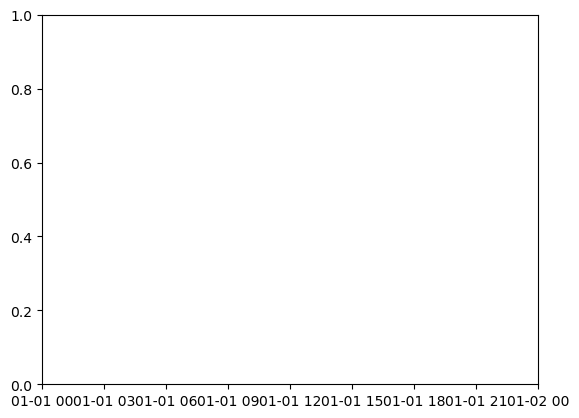

In [67]:
plt.plot(df_days.index, df_days['volatiliy_hl'].corr(df_days['volatiliy_hl']))
# plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Volatiliy of NVDA against time')
plt.xlabel('Timestemp')
plt.ylabel('volatiliy corr')
plt.tight_layout()
plt.show()

In [69]:
df_days[['volatiliy_hl', 'volatiliy_oc']].corr()

,volatiliy_hl,volatiliy_oc
volatiliy_hl,1.000000,0.032969
volatiliy_oc,0.032969,1.000000


In [ ]:
df_5min